# FIDE & Google Efficient Chess AI Challenge

In [70]:
%%capture
# ensure we are on the latest version of kaggle-environments
!pip install --upgrade kaggle-environments

In [71]:
# Now let's set up the chess environment!
from kaggle_environments import make
env = make("chess", debug=True)

In [72]:
# # this should run a game in the environment between two random bots
# # NOTE: each game starts from a randomly selected opening
# result = env.run(["random", "random"])
# env.render(mode="ipython", width=800, height=800) 

### Creating your first agent
Now let's create your first agent! The environment has the [Chessnut](https://github.com/cgearhart/Chessnut) pip package installed and we'll use that to parse the board state and generate moves.

In [73]:
# %%writefile main.py
# from Chessnut import Game
# import random

# def chess_bot(obs):
#     """
#     Simple chess bot that prioritizes checkmates, then captures, queen promotions, then randomly moves.

#     Args:
#         obs: An object with a 'board' attribute representing the current board state as a FEN string.

#     Returns:
#         A string representing the chosen move in UCI notation (e.g., "e2e4")
#     """
#     # 0. Parse the current board state and generate legal moves using Chessnut library
#     game = Game(obs.board)
#     moves = list(game.get_moves())

#     # 1. Check a subset of moves for checkmate
#     for move in moves:
#         g = Game(obs.board)
#         g.apply_move(move)
#         if g.status == Game.CHECKMATE:
#             return move

#     # 2. Check for captures
#     for move in moves:
#         if game.board.get_piece(Game.xy2i(move[2:4])) != ' ':
#             return move

#     # 3. Check for queen promotions
#     for move in moves:
#         if "q" in move.lower():
#             return move

#     # 4. Random move if no checkmates or captures
#     return random.choice(moves)

In [74]:
# %%writefile main.py
# import random
# from Chessnut import Game

# class ChessBot:
#     def __init__(self, search_depth=2):
#         """
#         Simplified chess bot with reduced complexity
        
#         Reduced search depth to improve reliability
#         """
#         self.search_depth = search_depth
        
#         # Simplified piece valuation
#         self.piece_values = {
#             'P': 1, 'N': 3, 'B': 3, 'R': 5, 'Q': 9, 
#             'p': -1, 'n': -3, 'b': -3, 'r': -5, 'q': -9
#         }

#     def evaluate_board(self, game):
#         """
#         Simple board evaluation based on piece values
        
#         TODO: Improve evaluation strategy
#         """
#         score = 0
#         board_str = game.board
#         for piece in board_str:
#             if piece in self.piece_values:
#                 score += self.piece_values[piece]
#         return score

#     def choose_best_move(self, obs):
#         """
#         Select the best move with simplified strategy
#         """
#         # Create game from board state
#         game = Game(obs.board)
#         moves = list(game.get_moves())
        
#         # Prioritize checkmate
#         for move in moves:
#             test_game = Game(obs.board)
#             test_game.apply_move(move)
#             if test_game.status == Game.CHECKMATE:
#                 return move
        
#         # Prioritize captures
#         if game.board.get_piece(Game.xy2i(move[2:4])) != ' ':
#             return move

#         # default to random move
#         return random.choice(moves)
            

# def chess_bot(obs):
#     """
#     Wrapper function to create bot and choose move
#     """
#     bot = ChessBot(search_depth=2)
#     return bot.choose_best_move(obs)

In [75]:
# %%writefile main.py
# import random
# from Chessnut import Game

# class ChessBot:
#     def __init__(self, search_depth=3):
#         """
#         Initialize the chess bot with configurable search depth.
        
#         TODO: Future improvements:
#         - Load opening book
#         - Configurable evaluation weights
#         - Machine learning model integration
#         """
#         self.search_depth = search_depth
        
#         # Basic piece valuation - simplified and to be expanded
#         self.piece_values = {
#             'P': 100,   # Pawn
#             'N': 320,   # Knight 
#             'B': 330,   # Bishop
#             'R': 500,   # Rook
#             'Q': 900,   # Queen
#             'K': 20000, # King
            
#             # Negative values for black pieces
#             'p': -100, 'n': -320, 'b': -330, 
#             'r': -500, 'q': -900, 'k': -20000
#         }

#     def evaluate_board(self, board):
#         """
#         Evaluate the board position.
        
#         Current implementation focuses on material balance.
        
#         Future improvements:
#         - Positional evaluation
#         - Piece mobility
#         - King safety
#         - Pawn structure analysis
#         """
#         #print('evaluating board')
#         #print(board)
#         score = 0
#         for square in str(board):
#             if square in self.piece_values:
#                 score += self.piece_values[square]
#         #print('score:' + str(score))
#         return score

#     def minimax(self, game, depth, maximizing_player):
#         """
#         Simple minimax algorithm with basic depth-limited search.
        
#         TODO: Future improvements:
#         - Alpha-beta pruning
#         - Quiescence search
#         - Transposition tables
#         - Better move ordering
#         """
#         #print('entering minmax')
#         # Base case: reached search depth or game over
#         if depth == 0 or game.status in [Game.CHECKMATE, Game.STALEMATE]:
#             return self.evaluate_board(game.board)

#         moves = list(game.get_moves())
        
#         if maximizing_player:
#             max_eval = float('-inf')
#             for move in moves:
#                 new_game = Game(game.get_fen())
#                 new_game.apply_move(move)
#                 eval_score = self.minimax(new_game, depth - 1, False)
#                 max_eval = max(max_eval, eval_score)
#             return max_eval
#         else:
#             min_eval = float('inf')
#             for move in moves:
#                 new_game = Game(game.get_fen())
#                 new_game.apply_move(move)
#                 eval_score = self.minimax(new_game, depth - 1, True)
#                 min_eval = min(min_eval, eval_score)
#             return min_eval

#     def choose_best_move(self, obs):
#         """
#         Select the best move using minimax algorithm.
        
#         Fallback to basic strategic rules if minimax fails.
        
#         TODO: Improve move selection strategy
#         """
#         game = Game(obs.board)
#         #print(obs.board)
#         moves = list(game.get_moves())
        
#         # Special case for immediate checkmate
#         for move in moves:
#             test_game = Game(obs.board)
#             test_game.apply_move(move)
#             if test_game.status == Game.CHECKMATE:
#                 return move
        
#         # Minimax move selection
#         best_moves = []
#         best_score = float('-inf')
        
#         for move in moves:
#             new_game = Game(obs.board)
#             new_game.apply_move(move)

#             #print('New game')
#             #print(new_game)
            
#             # Evaluate move using minimax
#             move_score = self.minimax(new_game, self.search_depth - 1, False)
            
#             if move_score > best_score:
#                 best_score = move_score
#                 best_move = [move] # start a new list with thi
        
#         # Completely random fallback if no good move found
#         res_move = ''
#         if best_move: 
#             res_move = best_move
#             #print('Best')
#         else:
#             res_move = random.choice(moves)
#             #print('Random')

#         #print('My move:' + res_move)
#         return res_move

# def chess_bot(obs):
#     """
#     Wrapper function to match the original interface.
#     Creates a ChessBot instance and selects a move.
#     """
#     #print(obs)
#     bot = ChessBot(search_depth=2)
#     return bot.choose_best_move(obs)

In [76]:
# %%writefile main_v5.py
# import random
# from Chessnut import Game

# class ChessBot:
#     def __init__(self, mark, remaining_time, search_depth=3):
#         """
#         Initialize the chess bot with configurable search depth.
        
#         TODO: Future improvements:
#         - Load opening book
#         - Configurable evaluation weights
#         - Machine learning model integration
#         """
#         self.mark = mark
#         self.remaining_time = remaining_time
#         self.panic_time = 0.5 # [sec]
#         self.search_depth = search_depth
        
#         # Basic piece valuation - simplified and to be expanded
#         self.piece_values = {
#             'P': 100,   # Pawn
#             'N': 320,   # Knight 
#             'B': 330,   # Bishop
#             'R': 500,   # Rook
#             'Q': 900,   # Queen
#             'K': 20000, # King
            
#             # Negative values for black pieces
#             'p': -100, 
#             'n': -320,
#             'b': -330, 
#             'r': -500, 
#             'q': -900, 
#             'k': -20000
#         }

#     def evaluate_board(self, board):
#         """
#         Evaluate the board position.
        
#         Current implementation focuses on material balance.
#         """
#         #print('evaluating board')
#         #print(board)
#         score = 0
#         for square in str(board):
#             if square in self.piece_values:
#                 score += self.piece_values[square]
#         if self.mark == 'black':
#             score = (-1) * score # if playing as black, we need to optimize for negative values
#         #print('score:' + str(score))
#         return score

#     def is_piece_in_danger(self, game, piece_square, opponent_moves):
#         """
#         Check if a piece on a given square is in danger.
        
#         Args:
#         - game: Current game state.
#         - square: Target square to check, e.g., "e4".
        
#         Returns:
#         - True if the piece on the square is under attack, False otherwise.
#         """
#         #print('move:' + move)
#         #target_square = move[2:4]  # Extract the target square from the move
#         #opponent_moves = list(game.get_moves())
#         for opp_move in opponent_moves:
#             if opp_move[2:4] == piece_square:  # Target square 
#                 #print('Piece in danger! Move ' + move)
#                 return True
#         return False


#     def minimax(self, game, last_move, depth, maximizing_player):
#         """
#         Simple minimax algorithm with basic depth-limited search.
#         """
#         #print('entering minmax')

#         moves = list(game.get_moves())
#         # Base case: reached search depth or game over
#         if depth == 0:
#             board_score = self.evaluate_board(game.board)
            
#             #game.board.get_piece(game.xy2i(move[:2]))
#             piece_square = last_move[2:4]
#             danger_penalty = self.is_piece_in_danger(game,piece_square, moves) * abs(self.piece_values[game.board.get_piece(game.xy2i(piece_square))])
#             #print("danger_penalty " + str(danger_penalty))
#             #if danger_penalty != 0: print("piece in danger " + last_move + " Penalty:" + str(danger_penalty))
#             score = board_score - danger_penalty # opponent stones values are negative - should work for both cases
#             #print("board_score:" + str(board_score) + " danger_penalty: " + str(danger_penalty) )
#             return score

        

#         if maximizing_player:
#             # me
#             max_eval = float('-inf')
#             for move in moves:
#                 new_game = Game(game.get_fen())
#                 new_game.apply_move(move)
#                 eval_score = self.minimax(new_game, depth - 1, False)
#                 max_eval = max(max_eval, eval_score)
#             return max_eval
#         else:
#             # opponent
#             min_eval = float('inf')
#             for move in moves:
#                 new_game = Game(game.get_fen())
#                 new_game.apply_move(move)
#                 eval_score = self.minimax(new_game, depth - 1, True)
#                 min_eval = min(min_eval, eval_score)
#             return min_eval

#     def choose_best_move(self, obs):
#         """
#         Select the best move using minimax algorithm.
        
#         Fallback to basic strategic rules if minimax fails.
        
#         TODO: Improve move selection strategy
#         """
#         # print('Choosing best move')
#         game = Game(obs.board)
#         #print(obs.board)
#         moves = list(game.get_moves())

#         # we have no time to think, just select anything randomly...
#         if (self.remaining_time < self.panic_time):
#             panic_move = random.choice(moves)
#             # print("Panic! Move:" + panic_move)
#             return panic_move

        
#         # Minimax move selection
#         best_moves = []
#         best_score = float('-inf')
        
#         for move in moves[:10]:
#             test_game = Game(obs.board)
#             test_game.apply_move(move)

#             if test_game.status == Game.CHECKMATE:
#                 # print("Checkmate move: " + move)
#                 return move
            
#             # Evaluate move using minimax
#             move_score = self.minimax(test_game, move, self.search_depth - 1, False)
            
#             # print('Move score:' + str(move_score))
#             # print('Best score:' + str(best_score))
#             if move_score > best_score:
#                 best_score = move_score
#                 best_moves = [move] # start a new list with this move
#                 #print('start a new list with move ' + move)
#             elif move_score == best_score:
#                 best_moves.append(move)
#             # print(best_moves)

#         res_move = random.choice(best_moves)
#         #print('Selected move:' + res_move + ' from following moves:' + str(best_moves))
#         #print('Score:' + str(best_score))
#         return res_move

# def chess_bot(obs):
#     """
#     Wrapper function to match the original interface.
#     Creates a ChessBot instance and selects a move.
#     """
#     print(obs)
#     bot = ChessBot(mark = obs.mark,remaining_time = obs.remainingOverageTime,search_depth=1)
#     return bot.choose_best_move(obs)


In [ ]:
# %%writefile main_v7.py

# # v6 - optimized by Chat GPT
# # v7 - add check for checkmate
# # v8 - 

# import random
# from Chessnut import Game
# from functools import lru_cache

# class ChessBot:
#     def __init__(self, mark, remaining_time, search_depth=3):
#         self.mark = mark
#         self.remaining_time = remaining_time
#         self.panic_time = 0.5  # [sec]
#         self.search_depth = search_depth

#         self.piece_values = {
#             'P': 100, 'N': 320, 'B': 330, 'R': 500, 'Q': 900, 'K': 20000,
#             'p': -100, 'n': -320, 'b': -330, 'r': -500, 'q': -900, 'k': -20000
#         }


#     @lru_cache(maxsize=1000)
#     def evaluate_board(self, board_fen):
#         """Evaluate the board position."""
#         piece_counts = {'P': 0, 'N': 0, 'B': 0, 'R': 0, 'Q': 0, 'K': 0,
#                         'p': 0, 'n': 0, 'b': 0, 'r': 0, 'q': 0, 'k': 0}

#         for char in board_fen.split()[0]:  # Focus only on the piece positions part of FEN
#             if char in piece_counts:
#                 piece_counts[char] += 1

#         score = sum(self.piece_values[piece] * count for piece, count in piece_counts.items())
#         return score if self.mark == 'white' else -score

#     @lru_cache(maxsize=1000)
#     def minimax(self, game_fen, depth, alpha, beta, maximizing_player):
#         """Minimax with alpha-beta pruning and caching."""
#         game = Game(game_fen)

#         if depth == 0 or game.status in {Game.CHECKMATE, Game.STALEMATE}:
#             return self.evaluate_board(game_fen)

#         moves = list(game.get_moves())
#         if maximizing_player:
#             max_eval = float('-inf')
#             for move in moves:
#                 new_game = Game(game.get_fen())
#                 new_game.apply_move(move)
#                 eval_score = self.minimax(new_game.get_fen(), depth - 1, alpha, beta, False)
#                 max_eval = max(max_eval, eval_score)
#                 alpha = max(alpha, eval_score)
#                 if beta <= alpha:
#                     break
#             return max_eval
#         else:
#             min_eval = float('inf')
#             for move in moves:
#                 new_game = Game(game.get_fen())
#                 new_game.apply_move(move)
#                 eval_score = self.minimax(new_game.get_fen(), depth - 1, alpha, beta, True)
#                 min_eval = min(min_eval, eval_score)
#                 beta = min(beta, eval_score)
#                 if beta <= alpha:
#                     break
#             return min_eval



#     def sort_moves(self, game, moves):
#         """
#         Sort moves based on a heuristic: prioritize captures.
#         """
#         captures = []
#         others = []

#         for move in moves:
#             target_square = move[2:4]
#             piece = game.board.get_piece(game.xy2i(target_square))
#             if piece:  # It's a capture
#                 captures.append(move)
#             else:
#                 others.append(move)

#         return captures + others

#     def choose_best_move(self, obs):
#         """
#         Select the best move with dynamic depth based on remaining time.
#         """
#         game = Game(obs.board)
#         moves = list(game.get_moves())
#         moves = self.sort_moves(game, moves)

#         if not moves:
#             return None  # No legal moves available (shouldn't happen normally)

#         # Panic mode: Random move if out of time
#         if self.remaining_time < self.panic_time:
#             return random.choice(moves)

#         # Dynamically adjust search depth
#         if self.remaining_time < 5:  # Low time left
#             search_depth = 1
#         elif self.remaining_time < 8:  # Moderate time left
#             search_depth = 2
#         else:  # Full depth if sufficient time
#             search_depth = self.search_depth

#         best_score = float('-inf')
#         best_moves = []
#         alpha = float('-inf')
#         beta = float('inf')

#         for move in moves:
#             # Clone the game and apply the move
#             new_game = Game(game.get_fen())
#             new_game.apply_move(move)

#             if new_game.status == Game.CHECKMATE:
#                 # print("Checkmate move: " + move)
#                 return move

#             # Minimax with reduced depth
#             move_score = self.minimax(new_game.get_fen(), search_depth - 1, alpha, beta, False)

#             if move_score > best_score:
#                 best_score = move_score
#                 best_moves = [move]
#             elif move_score == best_score:
#                 best_moves.append(move)

#         return random.choice(best_moves)



# def chess_bot(obs):
#     """Wrapper function to create and use the ChessBot."""
#     print(obs)
#     bot = ChessBot(mark=obs.mark, remaining_time=obs.remainingOverageTime, search_depth=2)
#     return bot.choose_best_move(obs)


Overwriting main_v8.py


In [83]:
%%writefile main_v8.py

# v6 - optimized by Chat GPT
# v7 - add check for checkmate
# v8 - Claude solution
import random
from Chessnut import Game

class UltraLightChessBot:
    def __init__(self, mark):
        self.mark = mark
        # Tiny piece values dictionary
        self.values = {
            'P': 10, 'N': 32, 'B': 33, 'R': 50, 'Q': 90, 'K': 200,
            'p': -10, 'n': -32, 'b': -33, 'r': -50, 'q': -90, 'k': -200
        }
        
        # Pre-computed center squares
        self.center = {'d4', 'd5', 'e4', 'e5'}

    def quick_score(self, move, board_fen):
        """Enhanced move scoring with capture risk assessment."""
        score = 0
        
        # Existing capture and center control logic
        if len(move) == 4:
            # Detailed capture evaluation
            captured_piece = self.get_captured_piece(move, board_fen)
            capturing_piece = self.get_capturing_piece(move, board_fen)
            
            if captured_piece:
                # Value-based capture scoring
                capture_value = abs(self.values.get(captured_piece, 0))
                capturing_value = abs(self.values.get(capturing_piece, 0))
                
                # Prioritize captures where value gained > value lost
                if capture_value > capturing_value * 0.5:
                    # Significant capture bonus
                    score += capture_value - capturing_value
                
                # Additional risk assessment
                if self.is_safe_capture(move, board_fen):
                    score += 30  # Bonus for safe captures
                else:
                    # Penalize risky captures
                    score -= 10

        return score

    def get_captured_piece(self, move, board_fen):
        """Identify the piece being captured."""
        target_square = move[2:4]
        for char in board_fen.split()[0]:
            if char in self.values and target_square in board_fen:
                return char
        return None

    def is_safe_capture(self, move, board_fen):
        """Basic risk assessment for captures."""
        # Check if capture exposes the capturing piece to immediate counter-capture
        capturing_piece = self.get_capturing_piece(move, board_fen)
        
        # Simple heuristics:
        # 1. Avoid capturing with high-value pieces if it leaves them vulnerable
        # 2. Prefer captures that don't expose critical pieces
        high_value_pieces = {'Q', 'R', 'K', 'q', 'r', 'k'}
        
        if capturing_piece in high_value_pieces:
            # More conservative approach for high-value pieces
            return False
        
        return True

    def get_capturing_piece(self, move, board_fen):
        """Identify the piece performing the capture."""
        source_square = move[0:2]
        for char in board_fen.split()[0]:
            if char in self.values and source_square in board_fen:
                return char
        return None

    def material_eval(self, board_fen):
        """Extremely lightweight material evaluation."""
        score = 0
        for char in board_fen.split()[0]:
            if char in self.values:
                score += self.values[char]
        return score

    def select_move(self, obs):
        """Probabilistic move selection with minimal computation."""
        game = Game(obs.board)
        moves = list(game.get_moves())
        
        if not moves:
            return None

        # Emergency time mode: random move
        if obs.remainingOverageTime < 1:
            return random.choice(moves)

        # Score moves quickly
        scored_moves = [
            (self.quick_score(move, obs.board) + 
             abs(self.material_eval(obs.board)), 
             move) 
            for move in moves
        ]
        
        # Sort and select from top moves
        scored_moves.sort(reverse=True)
        top_moves = scored_moves[:5]
        
        # Weighted random selection
        return top_moves[random.randint(0, min(len(top_moves)-1, 2))][1]

def chess_bot(obs):
    """Minimal wrapper for chess bot."""
    print(obs)
    bot = UltraLightChessBot(mark=obs.mark)
    return bot.select_move(obs)



Overwriting main_v8.py


### Testing your agent

Now let's see how your agent does againt the random agent!

{'remainingOverageTime': 10, 'step': 0, 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1', 'mark': 'white', 'opponentRemainingOverageTime': 10}
{'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'board': 'rnbqkbnr/pppppppp/8/8/6P1/8/PPPPPP1P/RNBQKBNR b KQkq g3 0 1', 'step': 1}
{'remainingOverageTime': 10, 'step': 2, 'board': 'rnbqkbnr/pp1ppppp/2p5/8/6P1/8/PPPPPP1P/RNBQKBNR w KQkq - 0 2', 'mark': 'white', 'opponentRemainingOverageTime': 10}
{'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'board': 'rnbqkbnr/pp1ppppp/2p5/6P1/8/8/PPPPPP1P/RNBQKBNR b KQkq - 0 2', 'step': 3}
{'remainingOverageTime': 10, 'step': 4, 'board': 'rnb1kbnr/ppqppppp/2p5/6P1/8/8/PPPPPP1P/RNBQKBNR w KQkq - 1 3', 'mark': 'white', 'opponentRemainingOverageTime': 10}
{'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'board': 'rnb1kbnr/ppqppppp/2p3P1/8/8/8/PPPPPP1P/RNBQKBNR b KQkq - 0 3', 'step': 5}
{'remaini


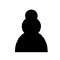
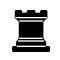
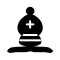
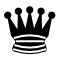
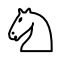
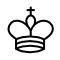
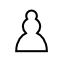
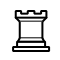
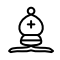
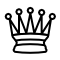
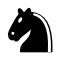
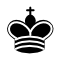

In [84]:
# result = env.run(["main.py", "random"])
result = env.run(["main_v8.py", "main_v5.py"])
#result = env.run(["main.py", "main.py"])
print("Agent exit status/reward/time left: ")
# look at the generated replay.json and print out the agent info
for agent in result[-1]:
    print("\t", agent.status, "/", agent.reward, "/", agent.observation.remainingOverageTime)
print("\n")
# render the game
env.render(mode="ipython", width=800, height=800) 

# To Submit:
1. Download (or save) main.py
2. Go to the [submissions page](https://www.kaggle.com/competitions/fide-google-efficiency-chess-ai-challenge/submissions) and click "Submit Agent"
3. Upload main.py
4. Press Submit!

Now doubt you are already thinking of ways this bot could be improved! Go ahead and fork this notebook and get started! ♟️

# Submitting Multiple files 
### (or compressing your main.py)

Set up your directory structure like this:
```
kaggle_submissions/
  main.py
  <other files as desired>
```

You can run `tar -czf submission.tar.gz -C kaggle_submissions .` and upload `submission.tar.gz`